In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow


# Índice de marginalización en México

Este trabajo de datos esta hecho a partir de la base de datos del Consejo Nacional de Población liberados el 04 de Octubre del 2021. Se enfoca en la **Base de datos por municipio 2020**, usando la tabla **IMM_2020**.

La tabla es una hoja de excel de nombre **IMM_2020** que exporté como un .*cvs*. El *encoding* fue con "latin-1" para poder leer los simbolos con acentuación y ñ, que en *.csv* son sustiuidos por el simbolo �.

In [2]:
IMM_2020 = pd.read_csv('IMM_2020.csv', encoding='latin-1')
IMM_2020

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,32,Zacatecas,32054,Villa Hidalgo,19446,7.497894,36.678176,3.010808,0.452908,2.254246,1.137416,21.932484,100.000000,90.877128,55.044146,Bajo,0.861915
2465,32,Zacatecas,32055,Villanueva,31558,4.199744,44.806459,2.536486,0.551254,1.073864,0.895418,15.269627,56.774827,81.912592,56.747058,Muy bajo,0.888580
2466,32,Zacatecas,32056,Zacatecas,149607,1.442438,19.436229,0.294739,0.163292,1.278559,0.484463,9.340958,7.461549,57.885307,60.176191,Muy bajo,0.942275
2467,32,Zacatecas,32057,Trancoso,20455,5.119108,31.992586,3.066130,0.500392,2.860086,1.344192,23.544577,16.788071,83.056133,56.958073,Muy bajo,0.891884


Antes de continuar, verificaré la integridad de los datos. Es decir, veré si la tabla contiene datos nulos que tenga que tomar en cuenta a la hora de trabajar con ella.

In [383]:
null_count = IMM_2020.isnull().sum()
columns_miss_data = null_count[null_count > 0]

if columns_miss_data.empty:
    print('Ninguna columna tiene datos nulos')
else:
    print('Las columas',''.join(columns_miss_data),'tienen datos nulos')


Ninguna columna tiene datos nulos


Se prosigue a obtener un analisis general de los datos.

Para esto es importante saber que significa cada abreviación.

| Variable | Descripción |
|---|---|
| CVE_ENT | Clave de entidad federativa |
| NOM_ENT | Nombre de entidad federativa |
| CVE_MUN | Clave del municipio |
| NOM_MUN | Nombre del municipio |
| POB_TOT | Población total |
| ANALF | Porcentaje de población analfabeta de 15 años o más |
| SBASC | Porcentaje de población de 15 años o más sin educación básica |
| OVSDE | Porcentaje de ocupantes en viviendas particulares habitadas sin drenaje ni excusado |
| OVSEE | Porcentaje de ocupantes en viviendas particulares habitadas sin energía eléctrica |
| OVSAE | Porcentaje de ocupantes en viviendas particulares habitadas sin agua entubada |
| OVPT | Porcentaje de ocupantes en viviendas particulares habitadas con piso de tierra |
| VHAC | Porcentaje de viviendas particulares con hacinamiento |
| PL.5000 | Porcentaje de población que vive en localidades menores a 5 000 habitantes |
| PO2SM | Porcentaje de población ocupada con ingresos de hasta 2 salarios mínimos |
| IM_2020 | Índice de marginación, 2020 |
| GM_2020 | Grado de marginación, 2020 |
| IMN_2020 | Índice de marginación normalizado, 2020 |



In [5]:
# Se toman los atributos cuantitativos del DataFrame.
cuantitive = ['POB_TOT','ANALF','SBASC','OVSDE','OVSEE','OVSAE','OVPT','VHAC','IM_2020','IMN_2020']

IMM_2020[cuantitive].describe()

,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,IM_2020,IMN_2020
count,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,53.955581,0.844869
std,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,3.904590,0.061140
min,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,21.406635,0.335198
25%,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,51.844432,0.811812
50%,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,54.423506,0.852196
75%,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,56.696126,0.887782
max,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,62.397145,0.977052


Lo que más llama la atencion de esta tabla, son los datos extremos, especialmente los datos máximos. Por ejemplo, existe una comunidad donde casi el 90% de su población mayor de 15 años que no tiene el nivel de eduación básica. Existe otra comunidad con el 81.79% de su problación sin acceso al agua embotellada. En general dos datos máximos estan increiblemente alejados de la media. Llama mucho la atención sobre el hecho de como el cuartil 75%, sea un valor tan pequeño en comparación del valor máximo en valores como la falta de acceso a la educacion, el drenaje, la energía electrica, etc., considero que es importante enfocarse en como son estas metricas de los valores mayores a este cuartil, y ver si no hay cambios de tendencia en relación a las variables.

## Marginación entre municipios y poblaciones

Los grados de marginalidad estan indicados por municipio, y a su vez cada municipio tiene diferente población. Para comparar como distribuida la población en las zonas según su grado de marginalidad se puede obtener que pocentaje de cada municipio se encuentra en cierto nivel de marginación. Es importante separar esta información por estado, porque cada estado dentro de su autonomía tomará las decisiones correspondientes a la su situación particular

In [6]:
#Grados de marginalidad
marginacion_orden = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']

Este es un dataframe donde se estan los estados y cuandos municipios estan en cierto grado marginación.

In [11]:
# Tabla dinamica: Cada nombre de estado es un índice, las columas son los grados de marginación
# Se cuenta cada municipio por estado en cada nivel de marginación

Marginacion_Estados = IMM_2020.pivot_table(index='NOM_ENT', columns='GM_2020', values='CVE_MUN', aggfunc='count')

Marginacion_Estados = Marginacion_Estados[marginacion_orden]    #Se ordenan las columnas

Marginacion_Estados['Total Municipios'] = Marginacion_Estados.sum(axis=1)   #Se agrega el total de municipios

# Los valores nulos (que indican que no hay municipios con ese grado) son designados por 0
Marginacion_Estados.fillna(0, inplace=True) 
Marginacion_Estados

GM_2020,Muy bajo,Bajo,Medio,Alto,Muy alto,Total Municipios
NOM_ENT,,,,,,
Aguascalientes,11.0,0.0,0.0,0.0,0.0,11.0
Baja California,5.0,0.0,1.0,0.0,0.0,6.0
Baja California Sur,5.0,0.0,0.0,0.0,0.0,5.0
Campeche,2.0,6.0,2.0,2.0,0.0,12.0
Chiapas,1.0,7.0,30.0,66.0,20.0,124.0
Chihuahua,31.0,19.0,4.0,2.0,11.0,67.0
Ciudad de México,16.0,0.0,0.0,0.0,0.0,16.0
Coahuila de Zaragoza,30.0,8.0,0.0,0.0,0.0,38.0
Colima,8.0,2.0,0.0,0.0,0.0,10.0


Aquí se empieza a ver como esta distribuida la marginación por estado, pero si se quiere ver como esta distribuido los grados de margianción no es suficiente, hay que hacer un analisis porcentual. Para esto se hay que obtener el porcentaje por estado de municipios en cada grado de marginación.

In [13]:
# Se calculan los porcentajes relativos de municipios por estado para cada grado de marginación
for grado in marginacion_orden:
    Marginacion_Estados[grado + ' (%)'] = Marginacion_Estados[grado] / Marginacion_Estados['Total Municipios'] * 100

Marginacion_Estados[[grado + ' (%)' for grado in marginacion_orden]]

GM_2020,Muy bajo (%),Bajo (%),Medio (%),Alto (%),Muy alto (%)
NOM_ENT,,,,,
Aguascalientes,100.000000,0.000000,0.000000,0.000000,0.000000
Baja California,83.333333,0.000000,16.666667,0.000000,0.000000
Baja California Sur,100.000000,0.000000,0.000000,0.000000,0.000000
Campeche,16.666667,50.000000,16.666667,16.666667,0.000000
Chiapas,0.806452,5.645161,24.193548,53.225806,16.129032
Chihuahua,46.268657,28.358209,5.970149,2.985075,16.417910
Ciudad de México,100.000000,0.000000,0.000000,0.000000,0.000000
Coahuila de Zaragoza,78.947368,21.052632,0.000000,0.000000,0.000000
Colima,80.000000,20.000000,0.000000,0.000000,0.000000


Una vez obtenidos estos porcentajes, es importante gráficar para hacer más fácil identificar comportamientos.

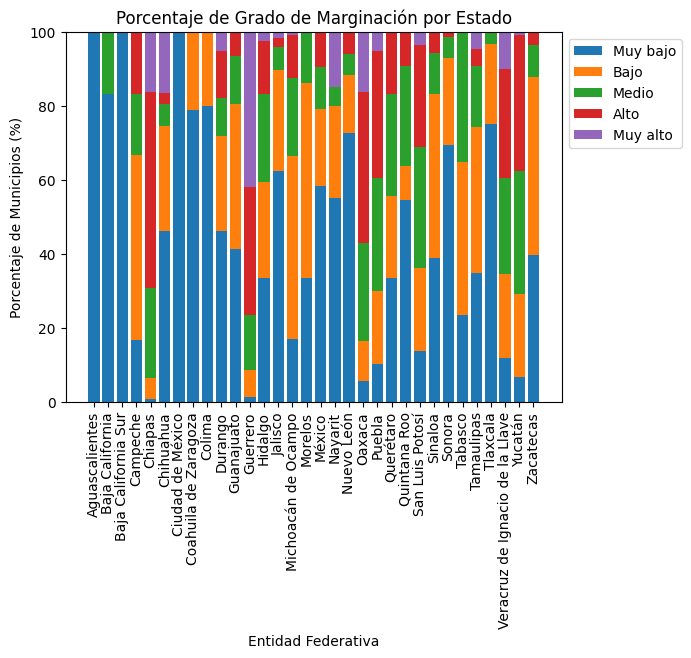

In [22]:
fig, ax = plt.subplots()

# Se obtienen los porcentajes relativos por grado de marginación para cada estado
porcentajes = Marginacion_Estados[[grado + ' (%)' for grado in marginacion_orden]].values.T

# Se crea las barras apiladas
bottom = [0] * len(Marginacion_Estados.index)
for i in range(len(marginacion_orden)):
    ax.bar(Marginacion_Estados.index, porcentajes[i], bottom=bottom, label=marginacion_orden[i])
    bottom += porcentajes[i] #Este es el apilamiento

ax.set_xlabel('Entidad Federativa')
plt.xticks(rotation=90)

ax.set_ylabel('Porcentaje de Municipios (%)')
ax.set_ylim(0, 100)

ax.set_title('Porcentaje de Grado de Marginación por Estado')

# Se separa la leyenda para que no se superponga a la gráfica
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig('graficas\porcmarg_estado_municipios.png', bbox_inches='tight')
plt.show()


Se puede ver que hay estados que gozan de grados de marginación bajos en relación a los municipios en dichos grados, a su vez que hay estados donde la mitad de sus municipios tienen grados de marginación de medio a alto. Para llegar más allá se tiene que analizar como esta distribuida la población en estos grados de marginación.

Se hace exactamente el mismo procedimiento, solo considerando que se analizará a la población de estas localidades, por lo que ahora las poblaciones se suman para ver como es su distribución porcentual en los grados de marginalidad.

In [18]:
# Tabla dinamica: Cada nombre de estado es un índice, las columas son los grados de marginación
# Se suma la población de cada municipio por estado en cada nivel de marginación
Marginacion_Estados_poblacion = IMM_2020.pivot_table(index='NOM_ENT', columns='GM_2020', values='POB_TOT', aggfunc='sum')
Marginacion_Estados_poblacion = Marginacion_Estados_poblacion[marginacion_orden]
Marginacion_Estados_poblacion['Total Municipios'] = Marginacion_Estados_poblacion.sum(axis=1)
Marginacion_Estados_poblacion.fillna(0, inplace=True)
Marginacion_Estados_poblacion

GM_2020,Muy bajo,Bajo,Medio,Alto,Muy alto,Total Municipios
NOM_ENT,,,,,,
Aguascalientes,1425607.0,0.0,0.0,0.0,0.0,1425607.0
Baja California,3651452.0,0.0,117568.0,0.0,0.0,3769020.0
Baja California Sur,798447.0,0.0,0.0,0.0,0.0,798447.0
Campeche,542922.0,255991.0,50823.0,78627.0,0.0,928363.0
Chiapas,604147.0,998167.0,1177464.0,1720632.0,1043418.0,5543828.0
Chihuahua,3410282.0,102330.0,20091.0,26108.0,183058.0,3741869.0
Ciudad de México,9209944.0,0.0,0.0,0.0,0.0,9209944.0
Coahuila de Zaragoza,3096015.0,50756.0,0.0,0.0,0.0,3146771.0
Colima,698142.0,33249.0,0.0,0.0,0.0,731391.0


In [19]:
# Se calculan los porcentajes relativos de municipios por estado para cada grado de marginación
for grado in marginacion_orden:
    Marginacion_Estados_poblacion[grado + ' (%)'] = Marginacion_Estados_poblacion[grado] / Marginacion_Estados_poblacion['Total Municipios'] * 100

Marginacion_Estados_poblacion[[grado + ' (%)' for grado in marginacion_orden]]

GM_2020,Muy bajo (%),Bajo (%),Medio (%),Alto (%),Muy alto (%)
NOM_ENT,,,,,
Aguascalientes,100.000000,0.000000,0.000000,0.000000,0.000000
Baja California,96.880675,0.000000,3.119325,0.000000,0.000000
Baja California Sur,100.000000,0.000000,0.000000,0.000000,0.000000
Campeche,58.481650,27.574451,5.474475,8.469424,0.000000
Chiapas,10.897651,18.005014,21.239187,31.036894,18.821255
Chihuahua,91.138466,2.734730,0.536924,0.697726,4.892154
Ciudad de México,100.000000,0.000000,0.000000,0.000000,0.000000
Coahuila de Zaragoza,98.387045,1.612955,0.000000,0.000000,0.000000
Colima,95.454005,4.545995,0.000000,0.000000,0.000000


Ya obtenidos estos porcentajes, se hace igualemente una gráfica de barras apiladas para ver como se distribuye la población en estos grados de marginación.

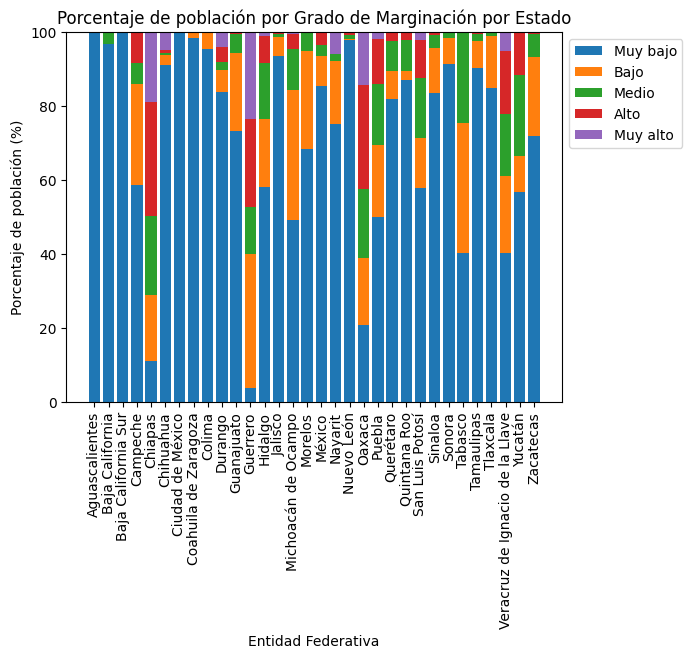

In [23]:
fig, ax = plt.subplots()

# Se obtienen los porcentajes relativos por grado de marginación para cada estado
porcentajes = Marginacion_Estados_poblacion[[grado + ' (%)' for grado in marginacion_orden]].values.T

# Se crea las barras apiladas
bottom = [0] * len(Marginacion_Estados_poblacion.index)
for i in range(len(marginacion_orden)):
    ax.bar(Marginacion_Estados_poblacion.index, porcentajes[i], bottom=bottom, label=marginacion_orden[i])
    bottom += porcentajes[i]

ax.set_xlabel('Entidad Federativa')
plt.xticks(rotation=90)

ax.set_ylabel('Porcentaje de población (%)')
ax.set_ylim(0, 100)

ax.set_title('Porcentaje de población por Grado de Marginación por Estado')

# Se separa la leyenda para que no se superponga a la gráfica
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig('graficas\porcmarg_estado_poblacion.png', bbox_inches='tight')
plt.show()

Se ponen las gráficas lado a lado para facilitar la comparación entre una y otra.

<div style="display:flex; justify-content:space-between; margin: 0 auto;">
    <div>
        <img src="graficas/porcmarg_estado_poblacion.png" width="600">
    </div>
    <div>
        <img src="graficas/porcmarg_estado_municipios.png" width="600">
    </div>
</div>



De manera muy inmediata se puede ver que la mayoria de la población reside en  municipios de baja o muy baja marginalidad, en especial en municipios de muy baja marginalidad. En general, los estados que tienen más del 50% de los municipios en un nivel de marginación bajo a muy alto, suelen tener a sus poblaciones más concentradas en las municipios de marginación muy baja a baja. Ejemplo de esto San Luis Potosí, Hidalgo, Querétaro, Tamaulipas, etc. La excepción de esto es ocurre cuando un 50% porciento de los municipios tienen un grado de marginación alto a muy alto, ya que el aproximadamente el 50% de su población se encuentra en estos municipios. Los municipios que siguen esta excepción son Chiapas, Guerrero y Oaxaca. Tomando el caso particular de Guerrero, se puede ver que más del 60% de sus municipios tienen un grado de marginación alto o muy alto, al mismo tiempo que el 50% de su población vive en los municipios de marginación media a muy baja. Comportamiento que es representativo de Chiapas y Oaxaca.

## Analfabetismo y poblaciones pequeñas

Para analizar si existe relación entre el porcentaje de analfabetismo y el porcentaje de poblaciones pequeñas, se hará un dataframe que contenga solo esta información.

In [25]:
analf_poblaciones = IMM_2020[['ANALF','PL.5000']]
analf_poblaciones

,ANALF,PL.5000
0,1.644738,7.523683
1,3.526405,78.221049
2,4.491509,51.301288
3,3.144867,65.470588
4,2.380588,37.164143
...,...,...
2464,7.497894,100.000000
2465,4.199744,56.774827
2466,1.442438,7.461549
2467,5.119108,16.788071


El dataframe en sí mismo no da una vista particular, pero, dentro de un gráfico de dispersión de puede apreciar como se comporta ambas cantidades entre sí. Tomando en cuenta que cada punto es un municipio, su altura y color en el gráfico indica el porcentaje de su población que es analfabeta, y mientras más a la derecha se encuentre, mayor es el porcentaje de localidades que conforman el municipio que tienen menos de 5000 habitantes.

Elegí que el gráfico de disperción con color, a pesar de tener solo dos variables, porque quería que se acentuara el porcentaje de población analfabeta y tener un gráfico más claro.

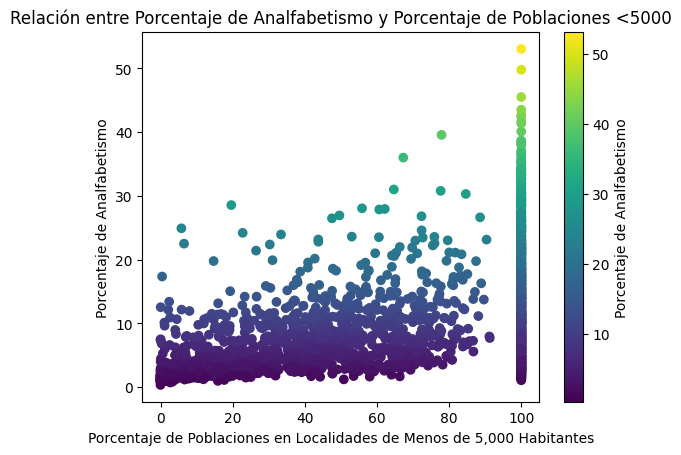

In [26]:
porcentaje_analfabetismo = analf_poblaciones['ANALF']
porcentaje_poblaciones = analf_poblaciones['PL.5000']

# Se crea el gráfico de dispersión con color
plt.scatter(porcentaje_poblaciones, porcentaje_analfabetismo, c=porcentaje_analfabetismo, cmap='viridis')

plt.xlabel('Porcentaje de Poblaciones en Localidades de Menos de 5,000 Habitantes')
plt.ylabel('Porcentaje de Analfabetismo')
plt.title('Relación entre Porcentaje de Analfabetismo y Porcentaje de Poblaciones <5000')

# Barra de color para realzar el indicador de analfabetismo
cbar = plt.colorbar()
cbar.set_label('Porcentaje de Analfabetismo')
plt.show()


Conforme aumenta el porcentaje de localidades con <5000 habiantes, parece haber cierta tendencia a que aumente el porcentaje de población analfabeta mayor de 15 años. Pero, antes de revisar cualquier correlación, creo que es importante omitir a los municipios con **PL.5000** de 100%, ya que estos rompen completamente la tendencia, pero posteriormente se retomará y motivara esta decisión.

In [394]:
# Se omiten los municipios PL.5000 de 100%
municipios_not100_pl5000 = IMM_2020.groupby(['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN']).filter(lambda x: x['PL.5000'].ne(100).any())
analf_poblaciones_not100_pl5000 = municipios_not100_pl5000[['ANALF','PL.5000']]
porcentaje_analfabetismo_not100_pl5000 = analf_poblaciones_not100_pl5000['ANALF']
porcentaje_poblaciones_not100_pl5000 = analf_poblaciones_not100_pl5000['PL.5000']

coef_corr = np.corrcoef(porcentaje_analfabetismo_not100_pl5000, porcentaje_poblaciones_not100_pl5000)[0, 1]
print('Hay un coeficiente de correlacion de:',coef_corr)

Hay un coeficiente de correlacion de: 0.49029119965463064


Este coeficiente de parece reforzar el que haya una correlación entre el PL.5000 y el porcentaje de analfabetismo, sin embargo no es una correlación fuerte, se necesita más estudio para entender como se produce esta relación y hasta donde son sus limites.

Hay que ser muy cuidadoso y trabajar el coeficiente de correlación cuidadosamente, ya que por si mismo no puede dar conclusiones. Aun así, en la gráfica se aprecia la tendencia, como mientras más aumeta el **PL.5000** los estados se dispersan hacía arriba en la grafica y tienen un color más brillante, por lo que la existencia de una relación no se puede negar, lo que se tiene que hacer es ver como sucede esta relación.

Se prosigue con el elefante en la habitación: desde el **IMM_2020** se podía ver que había municipios que estaban conformados en un 100% de localidades de <5000 habitantes. Sería conveniente, para analizar esta relación entre variables, ignorar las poblaciones que tengan 100% de localidades <5000 porque, como se puede ver llenan todo el rango de manera casi uniforme de porcentajes de analfabetismo, además de estar alejados por un porcentaje no despreciable del resto, por lo que veo importante destacar que estos municipios se tienen que revisar aparte del otro grupo más disperso, ya que muestran un evidente comportamiento atipico con respecto al grupo disperso. Es importante hacer esta clase de distinciones para analizar estos fenomenos. Se pueden hacer algunas suposiones sobre que sucede con este grupo (que llamaré de municipios pequeños), pero antes de hacerlas, creo que se debería examinar un **IMM_2020** con uno filtro donde solo haya 100% de **PL.5000**.

In [28]:
# Filtrar los municipios con 100% de PL.5000
municipios_100_pl5000 = IMM_2020.groupby(['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN']).filter(lambda x: x['PL.5000'].eq(100).all())
municipios_100_pl5000_lite = municipios_100_pl5000[['NOM_MUN', 'POB_TOT', 'PL.5000']]
municipios_100_pl5000_lite

,NOM_MUN,POB_TOT,PL.5000
28,Palizada,8683,100.0
34,Abasolo,1022,100.0
38,Candela,1643,100.0
41,Escobedo,3047,100.0
45,Guerrero,1643,100.0
...,...,...,...
2456,Tepetongo,6490,100.0
2457,Teúl de González Ortega,5356,100.0
2460,Vetagrande,10276,100.0
2464,Villa Hidalgo,19446,100.0


Se puede ver que los municpios **PL.5000** de 100% conforman la mitad de los municipios del país, por lo que no son un grupo para nada ignorable y que merecen su analisis particular. Para seguir explorando el tamaño de estos municipios se pueden hacer las siguiente comparaciones.

In [29]:
#Contamos los municipios que podrían compararse con una localidad de <5000
muni_menos_5000 = municipios_100_pl5000_lite[municipios_100_pl5000_lite['POB_TOT']<5000].count()[0]
print('Son', muni_menos_5000,'municipios de menos de 5000 habitantes')

# Contamos los municipios que podrían compararse con dos localidades de <5000
muni_menos_10000 = municipios_100_pl5000_lite[municipios_100_pl5000_lite['POB_TOT']<5000*2].count()[0]
print('Son', muni_menos_10000,'municipios de menos de 10000 habitantes')


Son 674 municipios de menos de 5000 habitantes
Son 953 municipios de menos de 10000 habitantes


Entonces, el aproximadamente 75% de los municipios que cumplen con ser solo localidades de <5000 habitantes, son en realidad uno y a lo mucho dos localidades de menos de 5000 habiantes, o muchas localidades pequeñas. Considero que a los municipios pequeños no le son aplicables, en primera instancia, las conclusiones que se puedan obtener del comportamiento general de la marginación de los estados. Estos municipios pequeños pueden tener una distribución en sus datos estadisticos muy diferente, y se deben analizar muchas más cosas en conjunto para ver como se comporta la marginalidad en estos.

 Para ver que tan diferente es este comportamiento se realizará el mismo analisis hecho en un principios de los grados de marginación en los municipios y las poblaciones por estado, pero tomando en cuenta solamente las localidades con **PL.5000** de 100%.

In [30]:
municipios_100_pl5000_pivot = municipios_100_pl5000.pivot_table(index='NOM_ENT', columns='GM_2020', values='CVE_MUN', aggfunc='count')
municipios_100_pl5000_pivot = municipios_100_pl5000_pivot[marginacion_orden]
municipios_100_pl5000_pivot['Total Municipios'] = municipios_100_pl5000_pivot.sum(axis=1)
municipios_100_pl5000_pivot.fillna(0, inplace=True)

# Se calculan los porcentajes relativos de municipios por estado para cada grado de marginación
for grado in marginacion_orden:
    municipios_100_pl5000_pivot[grado + ' (%)'] = municipios_100_pl5000_pivot[grado] / municipios_100_pl5000_pivot['Total Municipios'] * 100

municipios_100_pl5000_pivot[[grado + ' (%)' for grado in marginacion_orden]]
fig, ax = plt.subplots()

# Se obtienen los porcentajes relativos por grado de marginación para cada estado
porcentajes = municipios_100_pl5000_pivot[[grado + ' (%)' for grado in marginacion_orden]].values.T

# Se crea las barras apiladas
bottom = [0] * len(municipios_100_pl5000_pivot.index)
for i in range(len(marginacion_orden)):
    ax.bar(municipios_100_pl5000_pivot.index, porcentajes[i], bottom=bottom, label=marginacion_orden[i])
    bottom += porcentajes[i]

ax.set_xlabel('Entidad Federativa')
plt.xticks(rotation=90)

ax.set_ylabel('Porcentaje de Municipios (%)')
ax.set_ylim(0, 100)

ax.set_title('Porcentaje de Grado de Marginación por Estado para municipios pequeños')

# Crear una leyenda separada
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig('graficas\porcmarg_estado_municipios_pl5000.png', bbox_inches='tight')
plt.close()

In [33]:
municipios_100_pl5000_pob_pivot = municipios_100_pl5000.pivot_table(index='NOM_ENT', columns='GM_2020', values='POB_TOT', aggfunc='sum')
municipios_100_pl5000_pob_pivot = municipios_100_pl5000_pob_pivot[marginacion_orden]
municipios_100_pl5000_pob_pivot['Total Municipios'] = municipios_100_pl5000_pob_pivot.sum(axis=1)
municipios_100_pl5000_pob_pivot.fillna(0, inplace=True)

# Se calculan los porcentajes relativos de municipios por estado para cada grado de marginación
for grado in marginacion_orden:
    municipios_100_pl5000_pob_pivot[grado + ' (%)'] = municipios_100_pl5000_pob_pivot[grado] / municipios_100_pl5000_pob_pivot['Total Municipios'] * 100

municipios_100_pl5000_pob_pivot[[grado + ' (%)' for grado in marginacion_orden]]
fig, ax = plt.subplots()

# Se obtienen los porcentajes relativos por grado de marginación para cada estado
porcentajes = municipios_100_pl5000_pob_pivot[[grado + ' (%)' for grado in marginacion_orden]].values.T

# Se crea las barras apiladas
bottom = [0] * len(municipios_100_pl5000_pob_pivot.index)
for i in range(len(marginacion_orden)):
    ax.bar(municipios_100_pl5000_pob_pivot.index, porcentajes[i], bottom=bottom, label=marginacion_orden[i])
    bottom += porcentajes[i]

ax.set_xlabel('Entidad Federativa')
plt.xticks(rotation=90)

ax.set_ylabel('Porcentaje de Población (%)')
ax.set_ylim(0, 100)

ax.set_title('Porcentaje de poblacion por Grado de Marginación por Estado para municipios pequeños')

# Crear una leyenda separada
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig('graficas\porcmarg_estado_población_pl5000.png', bbox_inches='tight')
plt.close()

Estas gráficas comparan los comportamientos analizados anteriormente usando los datos de las poblaciones en general con los comportamientos obtenidos a partir de los municipios pequeños.

<div style="display:flex; justify-content:center;">
    <div>
        <img src="graficas/porcmarg_estado_municipios.png" width="600">
    </div>
    <div>
        <img src="graficas/porcmarg_estado_municipios_pl5000.png" width="600">
    </div>
</div>
<div style="display:flex; justify-content:center;">
    <div>
        <img src="graficas/porcmarg_estado_poblacion.png" width="600">
    </div>
    <div>
        <img src="graficas/porcmarg_estado_población_pl5000.png" width="600">
    </div>
</div>


Antes que nada, se omitieron algunos estados en la gráfica, ya que estados como como Aguascalientes, Baja California, entre otros, no tienen municipios con **PL.5000** de 100%.

Se puede ver que si tomamos los municipios pequeños, los comportamientos que analizamos en general para todos los municipios son diferentes, por lo que se refuerza el enunciado de que los resultados obtenidos apartir de todos los municipios no son aplicables en primera instancia para los municipios pequeños.

La tendencia descrita en un principio y las excepciones, han cambiado completamente. De hecho, se puede ver mucha semenjanza entre el porcentaje de municipio distribuido en los grados de marginación, y el porcentaje de poblaciones. Se ve reforzada la observación de que es importante no tomar al comportamiento de un estado en general con el comportamiento de sus comunidades pequeñas.

Por todo lo anterior, haré un dataframe con indicadores por estado, donde se compare la media de los indicadores cuantitativos (porcentaje de analfabetismo, acceso a la eduación y servicios basicos) con la media de los municipios pequeños.

Primero, hay que obtener el promedio de los indicadores por estado.

In [34]:
# Se calcula el promedio por estado de cada variable, excepto POB_TOT
avg_estado = IMM_2020.groupby(['CVE_ENT', 'NOM_ENT']).agg({ #Se obtiene el promedio de los indicadores porcentuales.
    'ANALF': 'mean',
    'SBASC': 'mean',
    'OVSDE': 'mean',
    'OVSEE': 'mean',
    'OVSAE': 'mean',
    'OVPT': 'mean',
    'VHAC': 'mean'
}).reset_index().set_index('CVE_ENT') #Se establece como indice la clave del estado

avg_estado

,NOM_ENT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC
CVE_ENT,,,,,,,,
1,Aguascalientes,3.118049,30.063087,1.056073,0.530232,0.969273,1.074021,19.687025
2,Baja California,2.912911,29.267552,0.305140,1.483801,5.243821,2.308207,16.978084
3,Baja California Sur,2.870950,27.156862,0.651467,1.184910,3.799233,4.087029,18.653066
4,Campeche,8.190987,34.836955,4.406495,1.530167,6.267697,3.487182,34.484602
5,Coahuila de Zaragoza,2.871204,30.418296,0.718646,0.471772,1.602855,0.765852,16.464859
6,Colima,4.590371,34.022105,0.598409,0.570229,1.089938,3.721316,17.792644
7,Chiapas,16.402529,54.040591,2.843284,1.759358,10.512035,13.543120,41.149652
8,Chihuahua,7.480793,49.421664,5.214129,5.549708,4.096368,6.096845,16.027021
9,Ciudad de México,1.421791,17.150186,0.073453,0.066558,1.856140,0.778280,14.667727


Ahora, se hace lo mismo para cada estado considerando solo a los municipios pequeños.

In [36]:
# Se filtran los municipios que cumplen la condición PL.5000 = 100%
municipios_100_pl5000 = IMM_2020.groupby(['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN']).filter(lambda x: x['PL.5000'].eq(100).all())

# Se calcula el promedio por estado de cada variable (filtrando por PL.5000 = 100%)
avg_estado_pl5000 = municipios_100_pl5000.groupby(['CVE_ENT', 'NOM_ENT']).agg({
    'ANALF': 'mean',
    'SBASC': 'mean',
    'OVSDE': 'mean',
    'OVSEE': 'mean',
    'OVSAE': 'mean',
    'OVPT': 'mean',
    'VHAC': 'mean'
}).reset_index().set_index('CVE_ENT')

avg_estado_pl5000

,NOM_ENT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC
CVE_ENT,,,,,,,,
4,Campeche,7.831809,34.280212,2.314815,2.129630,18.252315,3.807870,34.966415
5,Coahuila de Zaragoza,3.847609,37.352372,0.942467,0.627554,1.978639,0.697004,17.328811
6,Colima,7.124799,43.346357,1.305903,0.948122,1.932021,7.334526,18.907810
7,Chiapas,17.704698,56.796326,3.044887,1.780731,9.641960,14.518697,43.406498
8,Chihuahua,9.164518,56.044059,6.850753,6.832647,4.807195,7.614521,15.960100
10,Durango,6.224426,46.391762,7.939520,4.866675,5.750713,9.393143,21.922687
11,Guanajuato,10.728630,43.314515,6.633041,1.364950,9.802467,2.862767,21.210781
12,Guerrero,21.695850,60.442695,18.373268,3.122875,14.876594,23.256876,41.526381
13,Hidalgo,12.521287,42.302389,3.817128,1.387350,8.160145,4.789842,23.929335


Dado a que hay estados que no aparecen después de aplicar este filtro, se tienen que ajustar los indices de *avg_estado*

In [37]:
# Reindexar avg_estado para que tenga las mismas filas que avg_estado_pl5000
avg_estado_fixed = avg_estado.reindex(avg_estado_pl5000.index)
avg_estado_fixed

,NOM_ENT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC
CVE_ENT,,,,,,,,
4,Campeche,8.190987,34.836955,4.406495,1.530167,6.267697,3.487182,34.484602
5,Coahuila de Zaragoza,2.871204,30.418296,0.718646,0.471772,1.602855,0.765852,16.464859
6,Colima,4.590371,34.022105,0.598409,0.570229,1.089938,3.721316,17.792644
7,Chiapas,16.402529,54.040591,2.843284,1.759358,10.512035,13.543120,41.149652
8,Chihuahua,7.480793,49.421664,5.214129,5.549708,4.096368,6.096845,16.027021
10,Durango,4.651446,40.571062,5.397567,3.188545,3.510960,6.212350,19.574774
11,Guanajuato,7.638240,40.119724,3.536097,0.647404,3.570079,2.667772,19.303327
12,Guerrero,17.734256,53.523315,13.455128,2.200542,14.065886,19.005381,38.174931
13,Hidalgo,9.343649,36.346484,2.812493,0.974334,5.433695,3.642857,21.508552


In [402]:
# Se crea el DataFrame final que representa la diferencia con respecto a la media
diff_mean = avg_estado_pl5000.copy()

# Se calcula la diferencia con respecto a la media para cada variable
for column in avg_estado_pl5000.columns[1:]:
    diff_mean[column] = (diff_mean[column] - avg_estado_fixed[column])

diff_mean.to_parquet('diff_mean.parquet')

diff_mean

,NOM_ENT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC
CVE_ENT,,,,,,,,
4,Campeche,-0.359178,-0.556744,-2.091680,0.599463,11.984618,0.320689,0.481814
5,Coahuila de Zaragoza,0.976405,6.934076,0.223821,0.155782,0.375784,-0.068849,0.863952
6,Colima,2.534428,9.324252,0.707494,0.377893,0.842083,3.613210,1.115166
7,Chiapas,1.302169,2.755735,0.201603,0.021373,-0.870076,0.975577,2.256846
8,Chihuahua,1.683726,6.622395,1.636624,1.282939,0.710827,1.517677,-0.066921
10,Durango,1.572979,5.820700,2.541954,1.678130,2.239753,3.180793,2.347913
11,Guanajuato,3.090389,3.194791,3.096944,0.717545,6.232388,0.194994,1.907454
12,Guerrero,3.961594,6.919380,4.918139,0.922333,0.810708,4.251495,3.351450
13,Hidalgo,3.177638,5.955905,1.004635,0.413016,2.726450,1.146985,2.420782


Cuando el indicador es positivo significa el promedio de una variable por estado, considerando solo los municipios pequeños, es mayor que el promedio de dicha variable en el estado. Esto da una idea de a donde se deben dirigir los esfuerzos para reducir la marginalidad en los municipios pequeños de un estado. Por ejemplo, Nayarit tiene de las mayores diferencias en sus indicadores entre los estados. Nuevo León en sus comunidades pequeñas tiene bastante menos acceso a la eduación básica, al igual que Querétaro. Los municipios pequeños de Campeche tienen consideramente menos acceso al agua en comparación al estado en general. Ejemplos como este se repiten a lo largo del país, y es un buen lugar por donde empezar a formar politicas públicas.

Me parece de suma importancia comparar los indicadores generales de un estado con los indicadores considerando solo a los municipios pequeños porque los comportamientos, como se ha visto, son diferentes. Las poblaciones de estos municipios y sus problemas deben atenderse apropiadamente, y esto no se puede si no se toman en cuenta que su relación con la marginación tiene un comportamiento distinto al del estado en general. 

Estos municipios son alrededor de la mitad de los municipios totales del pais, y es de suma importancia tomarlos en cuenta y construir politicas públicas que los beneficien.